In [ ]:
### Singapore Airbnb Exploratory Data Analysis

In [ ]:
import re
import string
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from datetime import datetime
#from langdetect import detect
from wordcloud import WordCloud, STOPWORDS

import folium
from folium.plugins import HeatMap

from collections import Counter

### Functions to count unqiue categorical and numerical values

In [ ]:
def count_unique_categorical(df,col):
	for i in col:
		print('Column Name: ', i)
		print(df[i].value_counts(normalize=True))
		print()

In [ ]:
def count_unique_numerical(df,col):
    for i_num in col:
        print('Column Name: ', i_num)
        print('Max: ', df[i_num].max(), ' Min: ', df[i_num].min())
        print('Median', df[i_num].median())
        print('Mean', df[i_num].mean())
        print()

### Reviews Data

In [ ]:
# Import cleaned and preprocessed DF
reviews = pd.read_csv('SG_processed_reviews.csv', lineterminator='\n')
reviews.head(5)

,listing_id,comments,language,num_words
0,50646,A comfortable room in a smart condo developmen...,en,37
1,50646,Stayed over at Sujatha's house for 3 good nigh...,en,67
2,50646,It's been a lovely stay at Sujatha's. The room...,en,39
3,50646,"We had a great experience. A nice place, an am...",en,17
4,50646,Quiet condo. Comfortable stay and good location.,en,7


In [ ]:
# To find the distribution of the number of words
px.box(reviews, x="num_words")

In [ ]:
locate_max_words_review = reviews.iloc[reviews['num_words'].argmax()]
print(locate_max_words_review[1])

The front desk staff were all very friendly and helpful. The unit is quite nice, generally well-constructed, with a good layout and spacious enough for our family (two adults, two young kids) to stay comfortably for 6 nights. But our stay got off to a very bad start. We had selected this unit over others as the Airbnb largely due to the bed configuration. Airbnb shows the following details: 2 bedrooms - correct 3 beds – wrong, there are only two beds Bedroom 1: 1 king bed – wrong, it’s one queen bed Bedroom 2: 2 double beds – wrong, its one queen bed The actual two beds rather than the listed three beds was a problem for us. It might have been OK if one bed was really a king size bed as listed, but that wasn't so. When we checked in and found airbnb’s listing info to be incorrect on several details, the staff told us it was airbnb’s fault and that the entire building had no units with the details listed in Airbnb – not good news to hear when checking in. So we had to ask for an extra f

In [ ]:
print("Listing ID", locate_max_words_review[0])

Listing ID 24660198


The review that had 948 words seems like the traveller had a bad experience. Hence, he left an expectionally long review after his stay. 

### Listings Data

In [ ]:
# Import cleaned and preprocessed DF
listings = pd.read_csv('/work/SG_combined_train.csv')
listings

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities_str,dist_to_subway,name_lang,description_lang,host_months,comments,processed_name,processed_description,processed_neighborhood_overview,combined_text
0,34692602,Queen Bed in Mixed Dorm,"Ideally located at the heart of Little India, ...",No Data,2019-04-28,a few days or more,20.0,0.0,f,11.0,...,"""Shampoo"", ""Breakfast"", ""Essentials"", ""Hangers...",0.422493,en,en,33,this place is about what i expected considerin...,queen bed in mixed dorm,ideally located at the heart of little india a...,no data,queen bed in mixed dorm ideally located at the...
1,41304318,24hr self-checkin Queenbed RmW (Not For Tourist),"* NOT for tourist, only Singaporean or PR, lon...",- Apartment is within lavender neighbourhood (...,2018-07-12,within a few hours,88.0,96.0,f,56.0,...,"""Hangers"", ""Bed linens"", ""Cooking basics"", ""Wa...",0.432485,en,en,42,hillary is a great host really fast response t...,24hr selfcheckin queenbed rmw not for tourist,not for tourist only singaporean or pr long te...,apartment is within lavender neighbourhood hor...,24hr selfcheckin queenbed rmw not for tourist ...
2,19369423,Stay in Clarke Quay - 2BR Apartment,Whether it’s for the busy business traveller o...,Located in the city centre yet tucked away fro...,2017-06-19,within an hour,100.0,100.0,t,28.0,...,"""Dryer \u2013 In building"", ""Backyard"", ""Hange...",0.329589,en,en,55,excellent stay great service and perfect centr...,stay in clarke quay 2br apartment,whether it for the busy business traveller or ...,located in the city centre yet tucked away fro...,stay in clarke quay 2br apartment whether it f...
3,51512763,BUDGET FRIENDLY STUDIO HAVELOCK RD/TIONG BAHRU...,This studio apartment is a great choice for th...,"Situated along the Havelock Road, this apartme...",2017-10-27,within a few hours,95.0,30.0,f,225.0,...,"""Essentials"", ""Cleaning before checkout"", ""Han...",0.708737,pa,en,51,NaN,budget friendly studio havelock rdtiong bahru mrt,this studio apartment is a great choice for th...,situated along the havelock road this apartmen...,budget friendly studio havelock rdtiong bahru ...
4,28359844,Beautiful apartment right above MRT in Chinatown!,Very near to MRT Station. Facilities include ...,This place is simply so convenient because it’...,2018-07-27,No Data,NaN,100.0,t,1.0,...,"""Hangers"", ""Bed linens"", ""Washer"", ""Single lev...",0.163127,en,en,42,it really a beautifull apartment in the centre...,beautiful apartment right above mrt in chinatown,very near to mrt station facility include swim...,this place is simply so convenient because it ...,beautiful apartment right above mrt in chinato...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,34654117,1960s singlebed *RmAn @ lavender bugis,"- Airconditioned Single-bed room, wardrobe, de...",- Apartment is within lavender neighbourhood (...,2013-09-20,within a few hours,90.0,91.0,t,75.0,...,"""Hangers"", ""Bed linens"", ""Cooking basics"", ""Wa...",0.238719,en,en,100,nice common area could be more clean,1960s singlebed rman lavender bugis,airconditioned singlebed room wardrobe desk ch...,apartment is within lavender neighbourhood hor...,1960s singlebed rman lavender bugis airconditi...
2173,15724789,4bedroom apartment ★ Clementi(accept monthly s...,A comfortable and furnished 4 room unit. (Pict...,No Data,2016-10-24,a few days or more,46.0,71.0,f,49.0,...,"""Essentials"", ""Hangers"", ""Heating"", ""Kitchen"",...",1.680405,en,en,63,great apartment and very nice neighborhood we ...,4bedroom apartment clementiaccept monthly stay,a comfortable and furnished 4 room unit pictur...,no data,4bedroom apartment clementiaccept monthly stay...
2174,5919270,The Antiquity Room,Near to Singapore' newest attraction - Changi ...,Neighbourhood Consists of -A residential area...,2015-03-27,within a day,100.0,45.0,t,7.

In [ ]:
listings.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'amenities_str',

In [ ]:
listings.head(5)

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities_str,dist_to_subway,name_lang,description_lang,host_months,comments,processed_name,processed_description,processed_neighborhood_overview,combined_text
0,34692602,Queen Bed in Mixed Dorm,"Ideally located at the heart of Little India, ...",No Data,2019-04-28,a few days or more,20.0,0.0,f,11.0,...,"""Shampoo"", ""Breakfast"", ""Essentials"", ""Hangers...",0.422493,en,en,33,this place is about what i expected considerin...,queen bed in mixed dorm,ideally located at the heart of little india a...,no data,queen bed in mixed dorm ideally located at the...
1,41304318,24hr self-checkin Queenbed RmW (Not For Tourist),"* NOT for tourist, only Singaporean or PR, lon...",- Apartment is within lavender neighbourhood (...,2018-07-12,within a few hours,88.0,96.0,f,56.0,...,"""Hangers"", ""Bed linens"", ""Cooking basics"", ""Wa...",0.432485,en,en,42,hillary is a great host really fast response t...,24hr selfcheckin queenbed rmw not for tourist,not for tourist only singaporean or pr long te...,apartment is within lavender neighbourhood hor...,24hr selfcheckin queenbed rmw not for tourist ...
2,19369423,Stay in Clarke Quay - 2BR Apartment,Whether it’s for the busy business traveller o...,Located in the city centre yet tucked away fro...,2017-06-19,within an hour,100.0,100.0,t,28.0,...,"""Dryer \u2013 In building"", ""Backyard"", ""Hange...",0.329589,en,en,55,excellent stay great service and perfect centr...,stay in clarke quay 2br apartment,whether it for the busy business traveller or ...,located in the city centre yet tucked away fro...,stay in clarke quay 2br apartment whether it f...
3,51512763,BUDGET FRIENDLY STUDIO HAVELOCK RD/TIONG BAHRU...,This studio apartment is a great choice for th...,"Situated along the Havelock Road, this apartme...",2017-10-27,within a few hours,95.0,30.0,f,225.0,...,"""Essentials"", ""Cleaning before checkout"", ""Han...",0.708737,pa,en,51,NaN,budget friendly studio havelock rdtiong bahru mrt,this studio apartment is a great choice for th...,situated along the havelock road this apartmen...,budget friendly studio havelock rdtiong bahru ...
4,28359844,Beautiful apartment right above MRT in Chinatown!,Very near to MRT Station. Facilities include ...,This place is simply so convenient because it’...,2018-07-27,No Data,NaN,100.0,t,1.0,...,"""Hangers"", ""Bed linens"", ""Washer"", ""Single lev...",0.163127,en,en,42,it really a beautifull apartment in the centre...,beautiful apartment right above mrt in chinatown,very near to mrt station facility include swim...,this place is simply so convenient because it ...,beautiful apartment right above mrt in chinato...


### Categorical Columns

In [ ]:
# Inspect the values in categorical columns
find_unique_values_cat_col=["neighbourhood_group_cleansed", "neighbourhood_cleansed", "host_response_time", "instant_bookable", "property_type", "room_type", 
                            "host_identity_verified", "host_has_profile_pic", "host_is_superhost", "has_availability", "bathrooms_text"]

### Overview of the Categorial Variables

In [ ]:
count_unique_categorical(listings, find_unique_values_cat_col)

Column Name:  neighbourhood_group_cleansed
Central Region       0.777676
West Region          0.079927
East Region          0.069821
North-East Region    0.039045
North Region         0.033532
Name: neighbourhood_group_cleansed, dtype: float64

Column Name:  neighbourhood_cleansed
Kallang                    0.118052
Geylang                    0.102435
Downtown Core              0.083142
Outram                     0.080386
Rochor                     0.069821
Novena                     0.057878
Bedok                      0.051447
Bukit Merah                0.045016
Queenstown                 0.039963
River Valley               0.037207
Singapore River            0.028020
Tanglin                    0.024345
Clementi                   0.021589
Jurong East                0.021130
Orchard                    0.018833
Jurong West                0.018374
Newton                     0.017915
Woodlands                  0.015158
Marine Parade              0.014240
Bukit Timah                0.01378

### Numerical Columns

In [ ]:
# Inspect the values in numerical columns
find_unique_values_num_col=["host_response_rate", "host_acceptance_rate", "accommodates", "bedrooms", 
                            "beds", "availability_30", "availability_60","availability_90", "availability_365","review_scores_rating", 
                            "review_scores_accuracy", "review_scores_cleanliness","review_scores_checkin",
                            "review_scores_communication","review_scores_location","review_scores_value", 'price', 'number_of_reviews', 'host_months']

In [ ]:
count_unique_numerical(listings,find_unique_values_num_col)

Column Name:  host_response_rate
Max:  100.0  Min:  0.0
Median 95.0
Mean 78.72544878563886

Column Name:  host_acceptance_rate
Max:  100.0  Min:  0.0
Median 72.0
Mean 61.15020219526286

Column Name:  accommodates
Max:  16  Min:  1
Median 2.0
Mean 3.0473128158015617

Column Name:  bedrooms
Max:  8  Min:  1
Median 1.0
Mean 1.333945796968305

Column Name:  beds
Max:  46  Min:  1
Median 1.0
Mean 1.9715204409738172

Column Name:  availability_30
Max:  1.0  Min:  0.0
Median 0.4
Mean 0.45815342214056043

Column Name:  availability_60
Max:  1.0  Min:  0.0
Median 0.6666666666666666
Mean 0.5450620119430408

Column Name:  availability_90
Max:  1.0  Min:  0.0
Median 0.7555555555555555
Mean 0.59762159955086

Column Name:  availability_365
Max:  1.0  Min:  0.0
Median 0.8246575342465754
Mean 0.6132103372115706

Column Name:  review_scores_rating
Max:  5.0  Min:  0.0
Median 4.0
Mean 2.605337620578778

Column Name:  review_scores_accuracy
Max:  5.0  Min:  0.0
Median 4.0
Mean 2.6318144235186036

Column 

Based on the inspection above, we have found the following:
1) Price of some of the listings are as high as over $7,000
2) Review scores of listings range from 0 to 5
3) Hosts' acceptance and response range from 0 to 100
4) Number of accommodates ranges from 1 to 16
5) Number of reivews per listing ranges from 0 to 369
6) Number of months since the host listed its rental listing ranges from 1 to 136 

### Price

In [ ]:
# To find the distribution of the price of listings
px.box(listings, x="price")

The box plot shows the distribution of prices for the listings. It seems that there are quite a few listings that are above the upper quartile (3Q + 1.5*IQR), which indicates that there might be outliers in the dataset.

In [ ]:
# Inspect on listings with price > 1000

listings_above_1000 = listings.loc[listings['price'] > 1000]
listings_above_1000

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities_str,dist_to_subway,name_lang,description_lang,host_months,comments,processed_name,processed_description,processed_neighborhood_overview,combined_text
27,29549880,2-bedroom luxury penthouse + Jacuzzi + BBQ deck,This penthouse is located on the 20th floor. T...,No Data,2011-07-10,a few days or more,21.0,6.0,f,161.0,...,"""Indoor fireplace"", ""Hangers"", ""Washer"", ""Hair...",0.118722,en,en,126,NaN,2bedroom luxury penthouse jacuzzi bbq deck,this penthouse is located on the 20th floor th...,no data,2bedroom luxury penthouse jacuzzi bbq deck thi...
82,42932845,EXQUISITE 2BR SUITE W/D TERRACE@SENTOSA ISLAND,"Designed to offer a little more privacy, these...",Universal Studios Singapore is 1.5 Kms away fr...,2017-10-27,within a few hours,95.0,30.0,f,225.0,...,"""Backyard"", ""Hangers"", ""Bed linens"", ""Coffee m...",1.721870,es,en,51,NaN,exquisite 2br suite wd terracesentosa island,designed to offer a little more privacy these ...,universal studio singapore is 15 km away from ...,exquisite 2br suite wd terracesentosa island d...
94,23849245,2 Bedroom Villa with Private Pool,My place is close to Resorts World Sentosa. Yo...,No Data,2017-03-19,No Data,NaN,0.0,f,6.0,...,"""Shampoo"", ""Essentials"", ""Hangers"", ""Long term...",1.349589,en,en,58,NaN,2 bedroom villa with private pool,my place is close to resort world sentosa youl...,no data,2 bedroom villa with private pool my place is ...
96,21462227,Private Room [Kampong Glam] - for 8 pax,Conceived with the fuss-free traveller in mind...,No Data,2017-09-19,within a day,100.0,0.0,f,6.0,...,"""Shampoo"", ""Breakfast"", ""Essentials"", ""Buildin...",0.260555,en,en,52,the host canceled this reservation 16 day befo...,private room kampong glam for 8 pax,conceived with the fussfree traveller in mind ...,no data,private room kampong glam for 8 pax conceived ...
116,45918725,EXQUISITE 3BR SUITE W/D TERRACE@SENTOSA ISLAND,Ultra-luxury resort style 3-bedroom space loca...,Universal Studios Singapore is 1.5 Kms away fr...,2017-10-27,within a few hours,95.0,30.0,f,225.0,...,"""Sound system"", ""Cleaning before checkout"", ""B...",1.589942,es,en,51,NaN,exquisite 3br suite wd terracesentosa island,ultraluxury resort style 3bedroom space locate...,universal studio singapore is 15 km away from ...,exquisite 3br suite wd terracesentosa island u...
279,39404728,EXTRAVAGANT 3-BEDROOM APARTMENT@ANTHONY ROAD,The spacious three bedroom apartment provides ...,"With the finest shopping, dining and entertain...",2017-07-05,within a few hours,95.0,41.0,f,467.0,...,"""Indoor fireplace"", ""Hangers"", ""Bed linens"", ""...",0.450318,ru,en,54,NaN,extravagant 3bedroom apartmentanthony road,the spacious three bedroom apartment provides ...,with the finest shopping dining and entertainm...,extravagant 3bedroom apartmentanthony road the...
351,53854707,STAY AT THE 3BR LUXURY AT BUSTLING- ORCHARD RD,This premium 3 bedroom apartment is convenient...,The vicinity of the apartment is surrounded by...,2017-10-27,within a few hours,95.0,30.0,f,225.0,...,"""Cleaning before checkout"", ""Hangers"", ""Bed li...",0.630126,uk,en,51,NaN,stay at the 3br luxury at bustling orchard rd,this premium 3 bedroom apartment is convenient...,the vicinity of the apartment is surrounded by...,stay at the 3br luxury at bustling orchard rd ...
428,38137480,Perfectly Located 2 bedroom apt at Orchard,It is located in the popular and bustling shop...,"Conveniently located, this apartment is surrou...",2019-01-25,within a few hours,97.0,31.0,f,118.0,...,"""Hangers"", ""Coffee maker"", ""Kitchen"", ""Cooking...",0.639878,en,en,36,NaN,perfectly located 2 bedroom apt at orchard,it is located in the popular and bustling shop...,conveniently located this apartment is surroun...,perfectly located 2 bedroom apt at orchard it ...
640,29548473,2-bedroom luxury penthouse - 2 Jacuzzi's BBQ deck

There are a total of 21 listings that are priced above $1,000 and they are considered to be outliers. Hence, our group will be removing them.

In [ ]:
# Inspect the distribution of price for listings $1000 and below per night

listings = listings[listings["price"] <= 1000]
px.box(listings, x="price")

In [ ]:
px.histogram(listings, x="price")

In [ ]:
px.box(listings, x="price")
print("There are a total of",listings["price"].count(), "that are below $1000")


There are a total of 2156 that are below $1000


In [ ]:
print("Median price of listings")
print("{:.2f}".format(listings["price"].median()))

Median price of listings
134.00


The median price of all listings is SGD134.00 (for a benchmark)

### Room type

In [ ]:
count1 = listings["room_type"].value_counts()
df = pd.DataFrame({'room_type':count1.index, 'count':count1.values})
df

,room_type,count
0,Private room,991
1,Entire home/apt,958
2,Shared room,109
3,Hotel room,98


In [ ]:
#Plot distribution of room type
px.bar(df,  text_auto='.2s', title="Distribution of Room Types", x = "room_type", y = "count", color = "room_type", color_discrete_map={
                "Hotel room": "rgb(251,180,174)",
                "Private room": "rgb(179,205,227)",
                "Entire home/apt": "rgb(204,235,197)",
                "Shared room": "rgb(222,203,228)",
                })

From the bar graph, most of the listings are either private rooms or entire homes.

In [ ]:
#Median price of listings across room types
px.bar(listings.groupby(["room_type"]).median().reset_index(), x="room_type", y="price",text_auto='.2s', title="Median Price of Lisitings across Room Types", color = "room_type", color_discrete_map={
                "Hotel room": "rgb(251,180,174)",
                "Private room": "rgb(179,205,227)",
                "Entire home/apt": "rgb(204,235,197)",
                "Shared room": "rgb(222,203,228)",
                })


Entire home/ apartments are the most expensive, median SGD 200, followed by hotel room, private room and shared room. Based on observation, it seems like the type of room is correlated to the price.

In [ ]:
# Plot Median Review Scores Rating By Room Type
px.bar(listings.groupby(["room_type"]).median().reset_index(), x="room_type", y="review_scores_rating", text_auto='.2s', title="Median Review Score Rating of Listing by Room Type", 
        color = "room_type", color_discrete_map={
                "Hotel room": "rgb(251,180,174)",
                "Private room": "rgb(179,205,227)",
                "Entire home/apt": "rgb(204,235,197)",
                "Shared room": "rgb(222,203,228)",
                })



### Neighbourhood group

In [ ]:
x = listings["neighbourhood_group_cleansed"].value_counts()
px.pie(listings, x.index, x.values, title="Distribution of listings by neighbourhood group")

Most listings are in the Central region (77.6%).

In [ ]:
plot_dist_neigh_price=listings.groupby(["neighbourhood_group_cleansed"]).median().reset_index()
px.bar(plot_dist_neigh_price, x="neighbourhood_group_cleansed", y='price', text_auto='.2s', title="Median Price of Listing by Neighbourhood Group", color="neighbourhood_group_cleansed", color_discrete_map={
                "Central Region": "#636EFA",
                "West Region": "#EF553B",
                "East Region": "#00CC96",
                "North-East Region": "#AB63FA",
                "North Region": "#FFA15A"
                })


Listings in the Central region are the most expensive, median of SGD 145, higher than the median of all listings. Likely that geographical region of the listing is correlated to the price.

#### Listings in Top 10 Neighbourhoods

In [ ]:
#Top 10 neighbourhoods with the most listings -neighbourhood_cleansed
neighbourhood_topten=listings.groupby('neighbourhood_cleansed').count().reset_index().sort_values(['id'], ascending=False) [:10]
px.bar(neighbourhood_topten, x="neighbourhood_cleansed", y='id', text_auto='.2s', title ="Count of Listings for the Top 10 neighbourhoods", labels={'id':'Count'})


In [ ]:
#Median price for top 10 neighbourhoods with the most listings -neighbourhood_cleansed

neighbourhood_topten_list =[]
for i in neighbourhood_topten["neighbourhood_cleansed"]: 
    neighbourhood_topten_list.append(i)
neighbourhood_topten_price = listings.loc[listings["neighbourhood_cleansed"].isin(neighbourhood_topten_list)]
neighbourhood_topten_price_avg = neighbourhood_topten_price.groupby(["neighbourhood_cleansed"]).median().reset_index()
neighbourhood_topten_price_avg = neighbourhood_topten_price_avg.sort_values(by="price", ascending=False)
px.bar(neighbourhood_topten_price_avg, x="neighbourhood_cleansed", y="price",text_auto='.2s',title="Median Price of Listings for Top 10 Neighbourhood with the Most Listings")

### Heatmap of Listings in New York City 

In [ ]:
# Print the heatmap of the listings in Singapore
sg_geog=folium.Map([1.290270,103.851959],zoom_start=12)
HeatMap(listings[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(sg_geog)
display(sg_geog)


### Map Box of Price of Listings

In [ ]:
mapbox_price = px.scatter_mapbox(listings, lat="latitude", lon="longitude", color="price", #size="room_type",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
mapbox_price.show()


Based on the Map Box above, it seems like the Central-South region has the most number of higher priced listings which is consistent with the bar plot above.

### Superhost

Having the status of “Superhost” gives potential guests the knowledge that the host’s rental listings have consistently garnered good reviews and ratings (4.8 and above) over the past 12 months. Moreover, a “superhost” needs to maintain a response rate of at least 90% and a less than 1% cancellation rate. 

In [ ]:
x = listings["host_is_superhost"].value_counts()
px.pie(listings, x.index, x.values, color=x.index, title="Distribution of superhost status", color_discrete_map={
                "t": "rgb(204,235,197)",
                "f": "rgb(251,180,174)"
                })

The host of most listings do not have superhost status, only 20.7% of listings are hosted by superhosts.

In [ ]:
px.bar(listings.groupby(["host_is_superhost"]).median().reset_index(), x="host_is_superhost", y="price", text_auto='.2s',
        title="Median Price of Listings of Status of Host", color = "host_is_superhost", color_discrete_map={
                "f": "rgb(251,180,174)",
                "t": "rgb(204,235,197)"
                })


The median price of listings by superhosts is slightly higher ($15) than that of that of normal hosts.

In [ ]:
px.box(listings, x="room_type", y="price", color="host_is_superhost", notched=False, title="Distribution of Listings' Prices")

In [ ]:
is_superhost_listings = px.scatter_matrix(listings,
    dimensions=["bedrooms", "beds", "accommodates", "price"],
    color="host_is_superhost", symbol="host_is_superhost",
    title="Scatter Plot",
    labels={col:col.replace('_', ' ') for col in listings.columns}) # remove underscore
is_superhost_listings.update_traces(diagonal_visible=False)
is_superhost_listings.show()

In [ ]:
superhost_mths_price = px.scatter(listings, x="host_months", y="price", color="host_is_superhost",
                  hover_data=['price'])
superhost_mths_price.show()

Based on the scatter plot above, we are able to conclude that hosts with the status "SuperHost" is more likely to set the price of the listings lower as compared to normal hosts

### Property Type

#### Top 10 Property Type with the most listings

In [ ]:
# Top 10 Property Type with the most listings - property_type

property_type_topten = listings["property_type"].value_counts()[:10]
px.bar(property_type_topten,text_auto='.2s', title ="Count of Listings for the Top 10 neighbourhoods", labels={'value':'Count', 'index':'Property Type'})

#### Median Price of Top 10 Property Type with the most listings

In [ ]:
#Median price of listings across room types
property_type_topten_list = property_type_topten.keys().tolist()
property_type_topten_data = listings.loc[listings["property_type"].isin(property_type_topten_list)]
property_type_topten_avg = property_type_topten_data.groupby(["property_type"]).median().reset_index()

px.bar(property_type_topten_avg.groupby(["property_type"]).median().reset_index(), x="property_type", y="price",text_auto='.2s', title="Median Price of Lisitings across Propety Types")

#### Median Review Score Rating of Listing by Room Type

In [ ]:

px.bar(property_type_topten_avg.groupby(["property_type"]).median().reset_index(), x="property_type", y="review_scores_rating", text_auto='.2s', title="Median Review Score Rating of Listing by Room Type")


#### Plot Price Against Number of Reviews

In [ ]:
print("Scatter and Density Plot for Price Against Number of Reviews")
px.scatter(listings, x="number_of_reviews", y="price", title="Scatter for Price Against Number of Reviews")

Scatter and Density Plot for Price Against Number of Reviews


Based on the plot above, we are about to observe the following: 

1) Most of the listings have less than 50 reivews. 
2) For listings with more than 100 reviews, they are priced around SGD400 and below

#### Review Score Rating Against Price of Listings

In [ ]:

px.scatter(listings, x="review_scores_rating", y="price", title="Scatter for Review Score Rating Against Price of Listings")


Based on the plot above, the data suggests that: 
1) There is a significant number of listings that are rated 0 which could suggest that travellers did not rate the overall scores rating. 
2) Most of listings that are priced SGD400 and above seems to have high ratings though they are priced significantly higher on median. 


#### Review Score Rating Against Availability of Listing in the Past 1 year

In [ ]:

px.scatter(listings, x="review_scores_rating", y="availability_365", title="Review Score Rating Against Availability of Listing in the Past 1 year")


### Price against Distance(km) to MRT Station

In [ ]:

px.scatter(listings, x="dist_to_subway", y="price", title="Price against Distance to MRT Station")


Base on the scatter plot above, we are able to conclude that the further the listing from the station, the lower the price of the listing. Should the listing is near to subway stations, hosts should price their listings higher to maximise revenue


### Review Scores

In [ ]:
review_rating_dict = {'0.0-0.5':0, '0.5-1.0':0, '1.0-1.5':0, '1.5-2.0':0, '2.0-2.5':0, '2.5-3.0':0, '3.0-3.5':0, '3.5-4.0':0, '4.0-4.5':0, '4.5-5.0':0} 
for x in listings["review_scores_rating"]:
    if x<0.5:
        review_rating_dict['0.0-0.5'] += 1
    if x>=0.5 and x<1.0:
        review_rating_dict['0.5-1.0'] += 1
    if x>=1.0 and x<1.5:
        review_rating_dict['1.0-1.5'] += 1
    if x>=1.5 and x<2.0:
        review_rating_dict['1.5-2.0'] += 1
    if x>=2.0 and x<2.5:
        review_rating_dict['2.0-2.5'] += 1
    if x>=2.5 and x<3.0:
        review_rating_dict['2.5-3.0'] += 1
    if x>=3.0 and x<3.5:
        review_rating_dict['3.0-3.5'] += 1  
    if x>=3.5 and x<4.0:
        review_rating_dict['3.5-4.0'] += 1
    if x>=4.0 and x<4.5:
        review_rating_dict['4.0-4.5'] += 1
    else:
        review_rating_dict['4.5-5.0'] += 1  
print(review_rating_dict)
review_rating_x = review_rating_dict.keys()
review_rating_y = review_rating_dict.values()
px.bar(x=review_rating_x, y=review_rating_y, labels={'x': 'review_scores_rating', 'y': 'count'}, text_auto='.2s', title="Count of Review Score Ratings in Bins") 

{'0.0-0.5': 920, '0.5-1.0': 0, '1.0-1.5': 11, '1.5-2.0': 0, '2.0-2.5': 2, '2.5-3.0': 5, '3.0-3.5': 33, '3.5-4.0': 35, '4.0-4.5': 270, '4.5-5.0': 1886}


Most listings have a review score rating of 4.5-5.0

In [ ]:
review_scores_rating_split = listings[listings["review_scores_rating"]>=4.5]
px.histogram(review_scores_rating_split, x="review_scores_rating", nbins=5, text_auto='.2s', title="Histogram of Count of Review Scores Rating 4.5 and above")

In [ ]:
a = sum(listings.review_scores_rating >= 4.9)
b = listings['review_scores_rating'].count()
print("{:.2f}".format(a/b * 100.0), "% of listings have a review score rating of more than or equals to 4.9")

20.55 % of listings have a review score rating of more than or equals to 4.9


In [ ]:
px.box(listings, x="room_type", y="review_scores_rating", color="host_is_superhost", notched=False, title="Distribution of Listings' Prices across the Type of Rooms according to the Status of the Host")

### Verifitability of Host

In [ ]:
px.box(listings, x="room_type", y="review_scores_rating", color="host_identity_verified", notched=False, title="Distribution of Listings' Prices across the Type of Rooms according to the Verifitability of Host")


### Accommodates

In [ ]:
#Distribution of accommodates

col_label = "A"
col_values = "Count"
colors = ["rgb(8,48,107)",
        "rgb(8,81,156)",
        "rgb(33,113,181)",
        "rgb(66,146,198)",
        "rgb(107,174,214)",
        "rgb(158,202,225)",
        "rgb(179,205,227)",
        "rgb(198,219,239)",
        "rgb(222,235,247)",
        "rgb(247,251,255)"]

y = listings["accommodates"].value_counts().head(10)
new = pd.DataFrame({
    col_label: y.index,
    col_values: y.values
})
new = new.sort_values(
  by=col_label, 
  ascending=True)

fig = go.Figure(
    data=[go.Pie(
        labels=new[col_label],
        values=new[col_values],
        marker=dict(colors=colors),
        sort=False)])
#fig.update_traces(marker=dict(colors=px.colors.sequential.Blues))
fig.show()

In [ ]:
#Accommodates against median price
px.line(listings.groupby(["accommodates"]).median().reset_index(), x="accommodates", y="price")

Unlike the New York's data, listings that accommodates 7 people tend to be the highest. It could be due to the fact that Singaoore has limited land and most of the residents stay in HDBs. Hence, this suggests that most of the listings options could only accommodate up to a certain number of people.

### Host Response Time

In [ ]:
#Median price of listings across room types
px.bar(listings.groupby(["host_response_time"]).median().reset_index(), x="host_response_time", y="price",text_auto='.2s', title="Median Price of Lisitings across Room Types")

According to Airbnb, the hosts' response time is calculated based on the hosts' responses over the past 365 days. Hence, this suggests that hosts with no 'host_response_time' have not been active over the past year.

### Text Columns

### Name of Listings

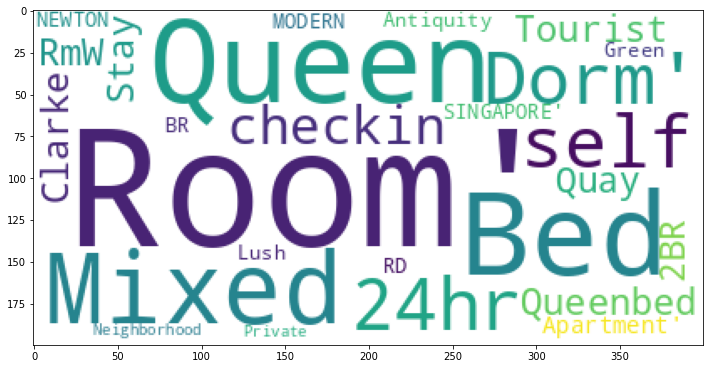

In [ ]:
text = str(listings["name"].values)
stopwords = set(STOPWORDS)
name_wc = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,12)) 
plt.imshow(name_wc)

Based on the WordCloud, it seems like most of the listings have "Room", "near" and "Expo" in the names

### Description

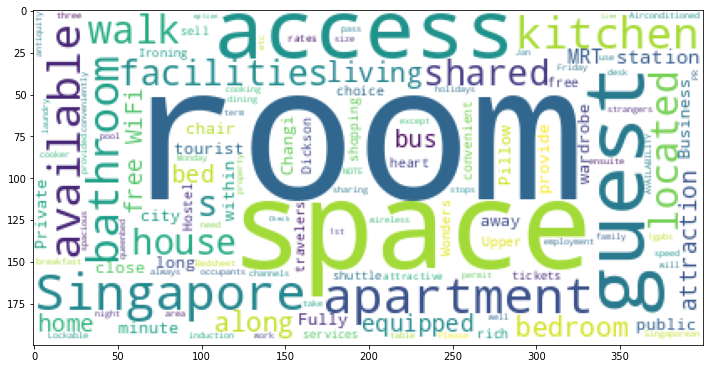

In [ ]:
text2 = str(listings["description"].values)
stopwords = set(STOPWORDS)
name_wc = WordCloud(stopwords=stopwords, background_color="white").generate(text2)
plt.figure(figsize=(12,12)) 
plt.imshow(name_wc)

### Amenities

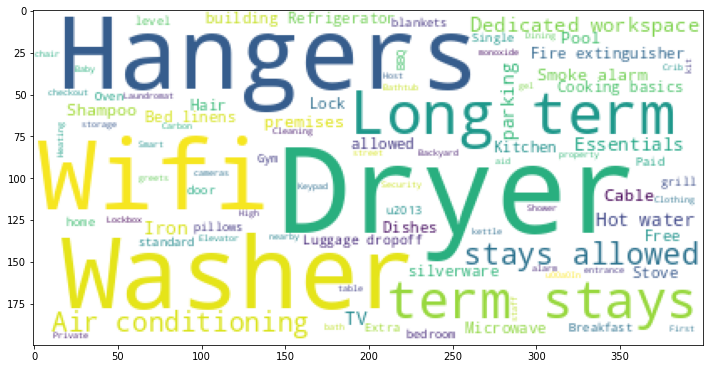

In [ ]:
text3 = str(listings["amenities"].values)
stopwords = set(STOPWORDS)
name_wc = WordCloud(stopwords=stopwords, background_color="white").generate(text3)
plt.figure(figsize=(12,12)) 
plt.imshow(name_wc)

In [ ]:
df1 = listings.copy()
df1['amenities'] = df1.amenities.apply(lambda x: x[1:-1].split(','))
def num_amenities(x):
    return len(x)
df1['num_amenities'] = df1['amenities'].map(lambda x: num_amenities(x))
amenities_count = df1["num_amenities"].value_counts()
df2 = pd.DataFrame({'num_amenities':amenities_count.index, 'count':amenities_count.values})
px.bar(df2,  text_auto='.2s', title="Distribution of Number of Amenities", x = "num_amenities", y = "count")

In [ ]:
px.box(df1, x="num_amenities")

In [ ]:
num_amenities_out = df1.loc[df1['num_amenities'] > 47]
num_amenities_out

#number of amenities > 47 - outliers

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,dist_to_subway,name_lang,description_lang,host_months,comments,processed_name,processed_description,processed_neighborhood_overview,combined_text,num_amenities
113,43922476,Stunning 1BR Suite (MRT right at doorstep),Branded Residences complete with Gym & Pool sh...,The apartment is also nestled right at a clust...,2014-05-08,within an hour,100.0,75.0,t,0.0,...,0.143775,en,en,92,if you are looking a cozy apartment around chi...,stunning 1br suite mrt right at doorstep,branded residence complete with gym pool share...,the apartment is also nestled right at a clust...,stunning 1br suite mrt right at doorstep brand...,58
152,32908981,"HIGH-LIVING 2 BR in CENTRE OF CITY, ORCHARD",Located in the most fashionable shopping desti...,"Located on Raffles quay, few minutes away from...",2017-07-05,within a few hours,95.0,41.0,f,467.0,...,1.082814,en,en,54,NaN,highliving 2 br in centre of city orchard,located in the most fashionable shopping desti...,located on raffle quay few minute away from or...,highliving 2 br in centre of city orchard loca...,55
213,32533341,"BY THE ICONIC RIVERSIDE, LUXURY 3BR @ CLARKE QUAY","Situated by the waterfront of Singapore River,...",Located within the CBD near the banks of the h...,2017-10-27,within a few hours,95.0,30.0,f,225.0,...,1.280326,ar,en,51,NaN,by the iconic riverside luxury 3br clarke quay,situated by the waterfront of singapore river ...,located within the cbd near the bank of the hi...,by the iconic riverside luxury 3br clarke quay...,63
243,42301284,"BY THE ICONIC RIVERSIDE, 1BR @ CLARKE QUAY","Situated by the waterfront of Singapore River,...",Located within the CBD near the banks of the h...,2017-10-27,within a few hours,95.0,30.0,f,225.0,...,0.607017,en,en,51,NaN,by the iconic riverside 1br clarke quay,situated by the waterfront of singapore river ...,located within the cbd near the bank of the hi...,by the iconic riverside 1br clarke quay situat...,68
409,52786987,"SPARKLING 1-BR, MINS TO ORCHARD, Singapore","Spacious and bright, 1 bedroom apartment is sp...","Located in a peaceful residential area, you ha...",2017-07-05,within a few hours,95.0,41.0,f,467.0,...,0.870724,en,en,54,NaN,sparkling 1br min to orchard singapore,spacious and bright 1 bedroom apartment is spe...,located in a peaceful residential area you hav...,sparkling 1br min to orchard singapore spaciou...,48
469,41568582,PREMIUM 2BR SPACE in VIBRANT LITTLE INDIA,Located right at the start of the ethnic encla...,Popular points of interest includes the very f...,2017-07-05,within a few hours,95.0,41.0,f,467.0,...,0.426983,en,en,54,the house is amazing easy and highefficiency c...,premium 2br space in vibrant little india,located right at the start of the ethnic encla...,popular point of interest includes the very fa...,premium 2br space in vibrant little india loca...,56
471,44525671,Walk to Marina Bay MRT/ AESTHETIC 2BR SPACE,"Set in the heart of city’s vibrant CBD, this i...","Located in CBD, enjoy a wide variety of local ...",2017-07-05,within a few hours,95.0,41.0,f,467.0,...,0.242944,oc,en,54,NaN,walk to marina bay mrt aesthetic 2br space,set in the heart of city vibrant cbd this is a...,located in cbd enjoy a wide variety of local d...,walk to marina bay mrt aesthetic 2br space set...,55
633,48510579,SG Clean Cozy serviced apartment 现代服务式公寓 | 免费无线网络,享受都市生活和无与伦比的便利住在悠邸服务式公寓. 位于新加坡市中心，我们的服务式公寓适合短期...,我们的公寓四周环绕着大型购物中心，博物馆和餐饮场所，可让您在新加坡步行范围内最便捷地前往各个...,2017-08-29,within an hour,100.0,99.0,t,10.0,...,0.224700,en,zh,53,NaN,sg clean cozy serviced apartment 现代服务式公寓 免费无线网络,享受都市生活和无与伦比的便利住在悠邸服务式公寓 位于新加坡市中心我们的服务式公寓适合短期和长...,我们的公寓四周环绕着大型购物中心博物馆和餐饮场所可让您在新加坡步行范围内最便捷地前往各个名胜...,sg clean cozy serviced apartment 现代服务式公寓 免费无线网...,50
673,22990388,2 Executive Suite Apartment along Orchard Road!,The 2-Bedroom Executive offers amenities such ...,Located along Orchard Road the main shopping s..

In [ ]:
num_amenities_filter = df1.loc[df1['num_amenities'] <= 47]
px.line(num_amenities_filter.groupby(["num_amenities"]).median().reset_index(), x="num_amenities", y="price")
#no obvious trend

In [ ]:
first = Counter(df1['amenities'][0])
for row in df1.amenities:
    if row != first:
        second = Counter(row)
        first.update(second)
occur_amenities = pd.DataFrame(first.items(), columns=['Amenities', 'Occurrence'])
occur_amenities = occur_amenities.sort_values(by=['Occurrence'], ascending=False)
occur_amenities.head(10)

#top 10 amenities by frequency

,Amenities,Occurrence
10,"""Air conditioning""",2093
9,"""Wifi""",2076
4,"""Long term stays allowed""",2074
5,"""Washer""",1827
33,"""Kitchen""",1652
13,"""Iron""",1638
2,"""Essentials""",1603
11,"""Dedicated workspace""",1602
7,"""Hair dryer""",1458
8,"""Dryer""",1438


In [ ]:
topten_list = occur_amenities.Amenities.head(10).tolist()

def topten(x):
    return all(elem in x for elem in topten_list)
df1['topten_amenities'] = df1['amenities'].map(lambda x: topten(x))
topten_count = df1["topten_amenities"].value_counts()
topten_count

False    1504
True      652
Name: topten_amenities, dtype: int64

In [ ]:
px.pie(topten_count, topten_count.index, topten_count.values, color=topten_count.index, title="Percentage of listings with the top 10 amenities", color_discrete_map={
                True: "rgb(204,235,197)",
                False: "rgb(251,180,174)"
                })

In [ ]:
px.bar(df1.groupby(["topten_amenities"]).median().reset_index(), x="topten_amenities", y="price", text_auto='.2s',title="Median Price of Listings with/without top 10 amenities", color="topten_amenities", color_discrete_map={
                True: "rgb(204,235,197)",
                False: "rgb(251,180,174)"
                })

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a92d0af-cecf-4cde-96f5-c3db3a7f88f1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>